# Capstone project (GreenGuard)

**Group Members:**
1.  Yazeed
2.  Sara
3.  Lena
4.  Jawaher



# Capstone idea:
**Plant disease detection robot :**
Building a robot capable of improving farming operations using modern techniques. The robot moves along a predefined path (Line follower robot) and is equipped with a precise processor (Raspberry-pi) and a camera (Raspberry-pi cam) to monitor plants in agricultural fields. Through the camera, we can analyze and identify plant images (disease plant(with the disease name) - healthy plant). Deep learning techniques (pre-trained model) are used to detect signs of disease in plants, and the diseased plant will be treated automatically using treatment materials, thereby increasing agricultural productivity and improving crop quality on farms and agricultural fields.

**Used Dataset:** PlantVillage dataset.

**Dataset Link:** https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

**Dataset Overview:** dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure.

**Modling:** we create & train a N.N. model with transfer learning based on MobileNetV2.

In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os,random
from mpl_toolkits.axes_grid1 import AxesGrid
import pathlib
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout
import cv2

In [ ]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 2.15.0
TensorFlow version: 2.15.0


# Downloud dataset from kaggle

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saramalharbi","key":"08175856d919f4f854bf795813bee391"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          16081        347  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                    2MB  2024-04-29 19:29:56           3218         73  1.0              
bhavikjikadara/global-electronics-retailers                      Global Electronics Retailers                       1MB  2024-05-01 09:08:52            916         25  1.0              
mexwell/heart-disease-dataset                                    🫀 Hea

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:22<00:00, 173MB/s]
100% 2.70G/2.70G [00:22<00:00, 127MB/s]


In [ ]:
! unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

# Data preprocessing

In [ ]:
#Preprocessing function:

def data_prep():
    #data augmentation
    train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                width_shift_range = 0.2,
                                                                height_shift_range = 0.2,
                                                                fill_mode="nearest")
    #Create the pipeline training dataset
    train_data = train_datagen.flow_from_directory(os.path.join(dataset_path,"train"),
                                                  target_size=(image_size,image_size),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode="categorical")
    # Normalization
    valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
    #Create the pipeline validation dataset
    valid_data = valid_datagen.flow_from_directory(os.path.join(dataset_path,"valid"),
                                                  target_size=(image_size,image_size),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode="categorical")
    return[train_data,valid_data]

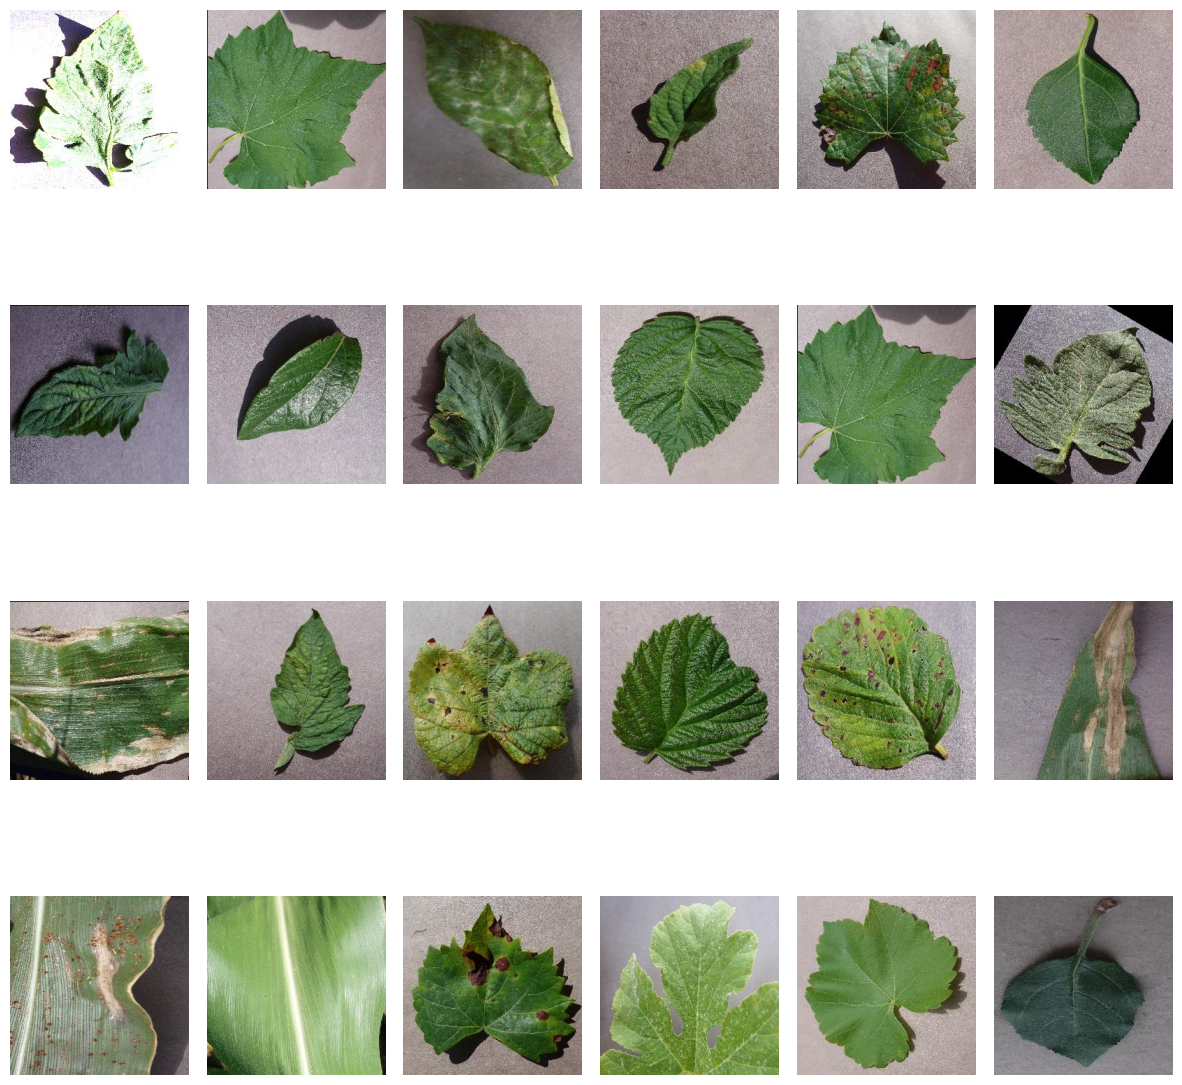

In [ ]:
image_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

## Parameters

In [ ]:
EPOCHS=100
BATCH_SIZE =32
PATIENCE=EPOCHS//5
LR_FACTOR=0.2
WEIGHTS_FILE = "weights.h5" #to store weights
image_size =224
dataset_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"  #our dataset
testdataset_path='/content/test/test'

In [ ]:
train_data = dataset_path + "/train"
valid_data = dataset_path + "/valid"
diseases = os.listdir(train_data)

## Class names

In [ ]:
#The training class names(each class indecate the disease name or healthy plant)
class_names=["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy",
             "Blueberry___healthy","Cherry_(including_sour)__Powedery_mildew","Cherry_(including_sour)__healthy",
             "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___Northern_Leaf_Blight",
             "Corn_(maize)___healthy","Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
             "Grape___healthy","Orange___Haunglongbing_(Citrus_greening)","Peach___Bacterial_spot","Peach___healthy",
             "Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight","Potato___Late_blight",
             "Potato___healthy","Raspberry___healthy","Soybean___healthy","Squash___Powdery_mildew",
             "Strawberry___Leaf_scorch","Strawberry___Healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight",
             "Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite",
             "Tomato___Target_Spot","Tomato_Yellow_Leaf_Curl_Virus","Tomato_mosaic_virus","Tomato___healthy"]

In [ ]:
print("Number of classes : ",len(class_names))

Number of classes :  38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print("Unique Plants are:" ,plants)

Unique Plants are: ['Tomato', 'Pepper,_bell', 'Cherry_(including_sour)', 'Raspberry', 'Corn_(maize)', 'Apple', 'Soybean', 'Peach', 'Potato', 'Blueberry', 'Strawberry', 'Orange', 'Squash', 'Grape']


In [ ]:
print("Number of plants:",len(plants))

Number of plants: 14


we have images of leaves of 14 plants and

In [ ]:
# number of unique diseases
print("Number of diseases: " ,NumberOfDiseases)

Number of diseases:  26


## Starting prepare the data

In [ ]:
# function for callbacks

def assign_callbacks(weights_file,patience,lr_factor):
  return[
      #save the weights
      tf.keras.callbacks.ModelCheckpoint(filepath=weights_file,
                                         monitor='val_accuracy',
                                         mode='max',
                                         save_best_only=True ,
                                         save_weights_only=True,
                                         verbose=0),

      tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                       mode='min',
                                       patience=patience,
                                       verbose=1),
      #Learning rate is reduced by 'lr_factor' if val_loss stagnates for a number of epochs set with 'patience/2' variable.*
      tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                           mode='min',
                                           factor=lr_factor,
                                           patience=patience//2,
                                           min_lr=1e-6,
                                           verbose=1)]

In [ ]:
train_data,valid_data=data_prep()
callbacks=assign_callbacks(WEIGHTS_FILE,PATIENCE,LR_FACTOR)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


# Modling

## Create the model architecture

In [ ]:
def create_model(base_model):
      x = base_model.output
      x = GlobalAveragePooling2D()(x)
      x = Dense(1024, activation='relu')(x)
      x=Dropout(0.2)(x)
      predictions = Dense(38, activation='softmax')(x)
      model = Model(inputs=base_model.input, outputs=predictions
                                      ,name="Plant_Disease_Detector")

      for layer in base_model.layers:
          layer.trainable = False

      base_learning_rate = 0.0001
      model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate)
                    ,loss='categorical_crossentropy' ,metrics='accuracy')

      return model

##Building model (MobileNetV2)

In [ ]:
base_model = MobileNetV2(weights='imagenet',
                        include_top=False ,input_shape=(224,224,3))
model=create_model(base_model)
model.summary()

9406464/9406464 [==============================] - 0s 0us/step


Model: "Plant_Disease_Detector"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv

## Train model

In [ ]:
history=model.fit(x=train_data , batch_size=BATCH_SIZE,
                 epochs=EPOCHS , verbose=2 ,
                 validation_data=valid_data,
                 steps_per_epoch=20,
                 validation_steps=10,
                 callbacks=callbacks)

Epoch 1/100
20/20 - 20s - loss: 3.1318 - accuracy: 0.2328 - val_loss: 2.1002 - val_accuracy: 0.4594 - lr: 0.0010 - 20s/epoch - 992ms/step
Epoch 2/100
20/20 - 11s - loss: 1.7822 - accuracy: 0.5234 - val_loss: 1.2589 - val_accuracy: 0.6531 - lr: 0.0010 - 11s/epoch - 528ms/step
Epoch 3/100
20/20 - 10s - loss: 1.1765 - accuracy: 0.6687 - val_loss: 1.0581 - val_accuracy: 0.7250 - lr: 0.0010 - 10s/epoch - 513ms/step
Epoch 4/100
20/20 - 9s - loss: 1.0440 - accuracy: 0.6906 - val_loss: 0.8499 - val_accuracy: 0.7344 - lr: 0.0010 - 9s/epoch - 426ms/step
Epoch 5/100
20/20 - 10s - loss: 0.9177 - accuracy: 0.7266 - val_loss: 0.7559 - val_accuracy: 0.7812 - lr: 0.0010 - 10s/epoch - 525ms/step
Epoch 6/100
20/20 - 10s - loss: 0.8271 - accuracy: 0.7594 - val_loss: 0.6637 - val_accuracy: 0.8000 - lr: 0.0010 - 10s/epoch - 525ms/step
Epoch 7/100
20/20 - 9s - loss: 0.7186 - accuracy: 0.7828 - val_loss: 0.5090 - val_accuracy: 0.8625 - lr: 0.0010 - 9s/epoch - 461ms/step
Epoch 8/100
20/20 - 9s - loss: 0.6109 

##Ploting trainig curve

In [ ]:
# function for visualization trainig curves
def plot_training_curves(history):
        train_acc=history.history['accuracy']
        val_acc=history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(train_loss))

        fig = plt.figure(figsize=(10,6))
        plt.rcParams.update({'font.size': 22})
        plt.plot(epochs,train_loss,c="red",label="Training Loss")
        plt.plot(epochs,val_loss,c="blue",label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        fig = plt.figure(figsize=(10,6))
        plt.plot(epochs,train_acc,c="red",label="Training Accuraccy")
        plt.plot(epochs,val_acc,c="blue",label="Validation Accuraccy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

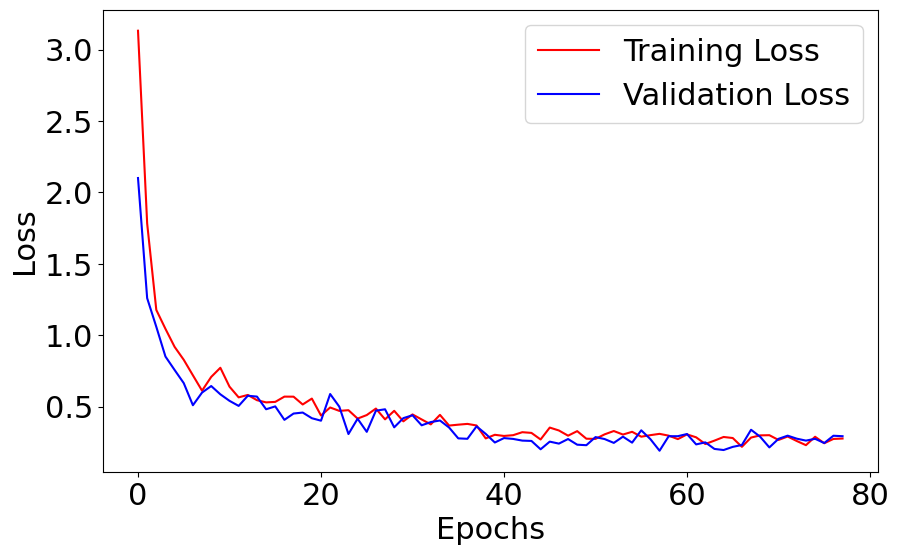

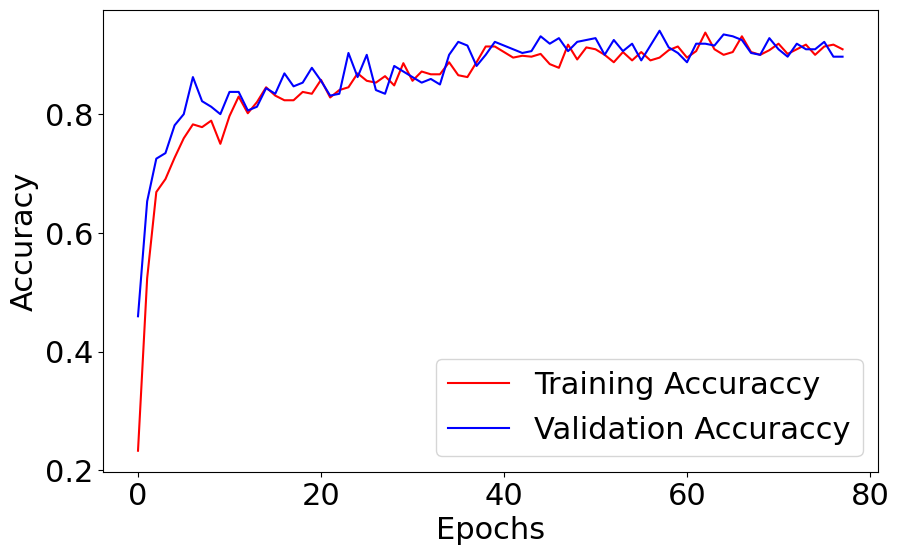

In [ ]:
plot_training_curves(history)

## Evaluate the model performance

In [ ]:
model.load_weights(WEIGHTS_FILE) #load weights
evaluation=model.evaluate(valid_data)
print(evaluation)

550/550 [==============================] - 42s 77ms/step - loss: 0.2653 - accuracy: 0.9155
[0.265311598777771, 0.9155474901199341]


In [ ]:
def test_model(path):
    i = 0
    labels = train_data.class_indices
    labels = {v: k for k, v in labels.items()}

    for filename in os.listdir(path):
        i += 1
        file_path = os.path.join(path, filename)

        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(file_path, grayscale=False, color_mode="rgb",
                                                     target_size=(image_size, image_size), interpolation="nearest")
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = labels[predicted_class_index]

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print("\nActual class:", pathlib.Path(filename))
        print("Predicted class:", predicted_class)

    print("\nTested:", i, "new unseen images")

In [ ]:
#Make predictions on the test_dataset (unseen dataset)
test_model(testdataset_path)

In [ ]:
# Save the trained model
model.save("plant_disease_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Fine tuning

In [ ]:
def create_model_tuned(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(38, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions, name="Plant_Disease_Detector")

    #for layer in base_model.layers:
     #   layer.trainable = False

    for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
        layer.trainable = True

    base_learning_rate = 0.0001
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_tuned = create_model_tuned(base_model)
model_tuned.summary()

Model: "Plant_Disease_Detector"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv

In [ ]:
history_tuned = model_tuned.fit(x=train_data,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=2,
                    validation_data=valid_data,
                    steps_per_epoch=20,
                    validation_steps=10,
                    callbacks=callbacks)

Epoch 1/100
20/20 - 19s - loss: 2.4842 - accuracy: 0.3625 - val_loss: 4.0102 - val_accuracy: 0.3531 - lr: 0.0010 - 19s/epoch - 926ms/step
Epoch 2/100
20/20 - 8s - loss: 1.1769 - accuracy: 0.6641 - val_loss: 6.7995 - val_accuracy: 0.2562 - lr: 0.0010 - 8s/epoch - 403ms/step
Epoch 3/100
20/20 - 9s - loss: 0.9741 - accuracy: 0.7125 - val_loss: 6.9152 - val_accuracy: 0.3313 - lr: 0.0010 - 9s/epoch - 472ms/step
Epoch 4/100
20/20 - 10s - loss: 0.8046 - accuracy: 0.7656 - val_loss: 11.1688 - val_accuracy: 0.2188 - lr: 0.0010 - 10s/epoch - 504ms/step
Epoch 5/100
20/20 - 10s - loss: 0.7213 - accuracy: 0.7828 - val_loss: 8.9906 - val_accuracy: 0.3125 - lr: 0.0010 - 10s/epoch - 502ms/step
Epoch 6/100
20/20 - 12s - loss: 0.7235 - accuracy: 0.7953 - val_loss: 9.4600 - val_accuracy: 0.3000 - lr: 0.0010 - 12s/epoch - 593ms/step
Epoch 7/100
20/20 - 8s - loss: 0.6317 - accuracy: 0.8109 - val_loss: 10.6386 - val_accuracy: 0.2344 - lr: 0.0010 - 8s/epoch - 420ms/step
Epoch 8/100
20/20 - 8s - loss: 0.6089 

In [ ]:
model_tuned.load_weights(WEIGHTS_FILE) #load weights
evaluation=model_tuned.evaluate(valid_data)
print(evaluation)

550/550 [==============================] - 36s 65ms/step - loss: 0.1756 - accuracy: 0.9484
[0.17555317282676697, 0.9483838081359863]


In [ ]:
def test_model_tuned(path):
    i = 0
    labels = train_data.class_indices
    labels = {v: k for k, v in labels.items()}

    for filename in os.listdir(path):
        i += 1
        file_path = os.path.join(path, filename)

        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(file_path, grayscale=False, color_mode="rgb",
                                                     target_size=(image_size, image_size), interpolation="nearest")
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model_tuned.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = labels[predicted_class_index]

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print("\nActual class:", pathlib.Path(filename))
        print("Predicted class:", predicted_class)

    print("\nTested:", i, "new unseen images")

In [ ]:
test_model_tuned(testdataset_path)

In [ ]:
model_tuned.save("plant_disease_model_tuned.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Convert to Tensorflow Lite

In [ ]:
# Converting the model to it's tensorflow lite equivalent for the live detection on the Raspberry Pi.
model_tuned.load_weights(WEIGHTS_FILE)

converter = tf.lite.TFLiteConverter.from_keras_model(model_tuned)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Saving
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)